# YOLO(You Only Look Once)

#### 객체 감지 (yolov8l.pt, yolov8m.pt, yolov8n.pt, yolov8s.pt, yolov8x.pt, yolov8x6.pt)
#### 분할 (yolov8l-seg.pt, yolov8m-seg.pt, yolov8n-seg.pt, yolov8s-seg.pt, yolov8x-seg.pt)
#### 분류 (yolov8l-cls.pt, yolov8m-cls.pt, yolov8n-cls.pt, yolov8s-cls.pt, yolov8x-cls.pt)

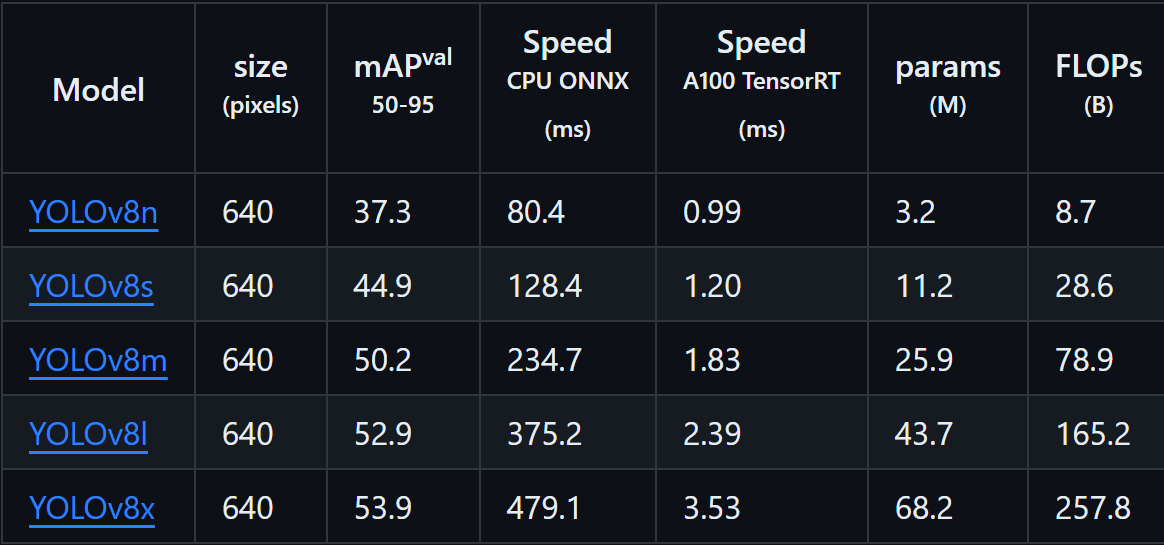

* 'n' 모델 이미지 객체인식에 약 40~50[ms]가 소요 된다.
* 'x' 모델 이미지 객체인식에 약 300~400[ms]가 소요된다.

# CLI 기본 사용법
* yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

* 이미지에서 객체 탐지
    - yolo predict model=yolov8n.pt source='image.jpg'
* 비디오에서 객체 탐지
    - yolo predict model=yolov8n.pt source='video.mp4'
* 웹캠을 사용하여 실시간 객체 탐지
 - yolo predict model=yolov8n.pt source=0 show=True

1. 여러 이미지 파일을 받아 드라이브에 업로드
2. 모델을 구축
3. 업로드된 이미지 파일 모델 적용

* roboflow : https://public.roboflow.com

In [1]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# # 파일명 변경
# # 받아온 파일명을 정리해야 나중에 편할 듯
# import os
# folder_path = 'C:/Users/user/Documents/Project_3rd/images'
# png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
# png_files.sort()  # 파일을 정렬하여 이름을 순차적으로 변경합니다.
# for i, file in enumerate(png_files, start=1):
#     # 새 파일명 설정 (image_1.png, image_2.png, ...)
#     new_file_name = f"image_{i}.png"
#     # 파일 이름 변경
#     os.rename(os.path.join(folder_path, file), os.path.join(folder_path, new_file_name))
# print("파일 이름 변경 완료!")

In [ ]:
import os
import shutil

# 업로드된 파일이 들어갈 폴더 생성
folder_name = 'upload_images'
os.makedirs(folder_name, exist_ok=True)

# 현재 디렉토리의 파일 목록을 가져오기
current_directory = os.getcwd()
files_to_upload = [f for f in os.listdir(current_directory) if os.path.isfile(os.path.join(current_directory, f))]

# 파일을 업로드하고 폴더로 이동
for filename in files_to_upload:
    src_path = os.path.join(current_directory, filename)
    dest_path = os.path.join(folder_name, filename)
    shutil.move(src_path, dest_path)

# 폴더 안의 파일 목록 출력
print(f'Files moved to folder {folder_name}: {os.listdir(folder_name)}')

In [2]:
import ultralytics
from ultralytics import YOLO

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 너무 느리기에 코랩에서 하면 될듯
model = YOLO('yolov8x.yaml').load('yolov8x.pt')  # 가중치 전송

# 모델 학습
result = model.train(data='coco128.yaml', epochs=100, imgsz=320)

In [3]:
import torch

# 학습 시킨 모델 가중치 저장
torch.save(model.state_dict(), 'my_yolo_weights.pth')
# 학습 시킨 모델 저장
torch.save(model, 'my_yolo_model.pth')

# # 모델 아키텍처만 불러오기
# model = torch.load('yolo_model.pth')

# # 모델 가중치만 불러오기 (모델 아키텍처는 미리 정의되어 있어야 함)
# model = YOLO()  # 예시로 YOLO 클래스의 인스턴스 생성
# model.load_state_dict(torch.load('yolo_weights.pth'))

In [ ]:
# pre_trained model 불러오기 or 파인튜닝한 모델 불러오기
# 파인 튜닝까지 시간이 생기면 도전

# 예측 실행
want_images = '/content/upload_images'
results = model.predict(want_images,task = 'detect',save = True)  # 이미지에 대한 예측 실행

In [ ]:
import os
import shutil

original_dir = f'runs/detect/predict'
output_dir = '/content/output'

# 목적지 디렉토리가 존재하지 않으면 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 원본 디렉토리의 내용을 목적지 디렉토리로 복사
for item in os.listdir(original_dir):
    s = os.path.join(original_dir, item)
    d = os.path.join(output_dir, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, False, None)
    else:
        shutil.copy2(s, d)
print('output폴더에 저장 완료')

In [9]:
!pip install yolov8

     ---------------------------------------- 0.0/88.3 kB ? eta -:--:--
     ------------------------------------- -- 81.9/88.3 kB ? eta -:--:--
     ---------------------------------------- 88.3/88.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
      --------------------------------------- 0.8/38.2 MB 17.9 MB/s eta 0:00:03
     -- ------------------------------------- 2.0/38.2 MB 25.7 MB/s eta 0:00:02
     ---- ----------------------------------- 4.0/38.2 MB 32.0 MB/s eta 0:00:02
     ------ --------------------------------- 5.8/38.2 MB 37.2 MB/s eta 0:00:01
     -------- ------------------------------- 7.9/38.2 MB 39.0 MB/s eta 0:00:01
     ---------- ---------------------------- 10.3/38.2 MB 40.9 MB/s eta 0:00:01
     ------------ -------------------------- 11.9/38.2 MB 40.9 MB/s eta 0:00:01
     -------------- ---------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2023.10.0 which is incompatible.


In [15]:
!pip install yolov5

In [16]:
from yolov5.data import datasets
datasets.download('imagenet2012')  # ImageNet 다운로드

ImportError: cannot import name 'datasets' from 'yolov5.data' (unknown location)

In [ ]:
from ultralytics import YOLO
model2 = YOLO('yolov8x-cls.pt').load('yolov8x-cls.pt') 
results = model.train(data='imagenet2012', epochs=100, imgsz=320)

In [ ]:
from yolov5 import download, datasets

# coco128 다운로드
download('imagenet2012')

# 데이터셋 불러오기
dataset = datasets.Coco128('./data/coco128.yaml', image_dir='./data/images')

# 데이터셋 사용 예시
for i in range(len(dataset)):
    img, targets = dataset[i]
    print(f"Image shape: {img.shape}, Targets: {targets}")


In [4]:
model2 = YOLO('yolov8x-cls.pt').load('yolov8x-cls.pt')  # 가중치 전송


# 다운로드한 ImageNet 데이터셋을 사용하여 모델 학습
results = model2.train(data='coco128.yaml', epochs=100, imgsz=320)

Transferred 302/302 items from pretrained weights
New https://pypi.org/project/ultralytics/8.0.218 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.215 🚀 Python-3.11.4 torch-2.1.1+cpu CPU (Intel Core(TM) i5-10600 3.30GHz)
engine\trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=coco128.yaml, epochs=100, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False,

RuntimeError: Dataset 'coco128.yaml' error  [WinError 5]  : 'C:\\Users\\datasets'

In [6]:
import torch

In [10]:
import ultralytics
from ultralytics import YOLO

In [17]:
import torch
from torchvision import models
# 모델 정의


# 모델 아키텍처 만들기/ 가중치 세팅
model = YOLO('yolov8x.yaml').load('yolov8x.pt')

# 미리 저장한 상태의 모델 불러오기

model.load_state_dict(torch.load('my_yolo_model.pth'))


                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640

100%|███████████████████████████████████████████████████████████████████████████████| 131M/131M [00:03<00:00, 45.4MB/s]


Transferred 595/595 items from pretrained weights


<All keys matched successfully>

In [18]:
want_images = 'images/*'
results = model.predict(want_images,task = 'detect',save = True) 


image 1/9 C:\Users\user\Documents\Project_3rd\images\거리.jpg: 640x480 5 2s, 1 7, 1 74, 718.1ms
image 2/9 C:\Users\user\Documents\Project_3rd\images\거실.jpg: 640x640 2 59s, 879.7ms
image 3/9 C:\Users\user\Documents\Project_3rd\images\교실.jpg: 480x640 1 56, 600.4ms
image 4/9 C:\Users\user\Documents\Project_3rd\images\길거리.jpg: 640x448 1 0, 6 2s, 3 7s, 1 11, 2 58s, 619.0ms
image 5/9 C:\Users\user\Documents\Project_3rd\images\도로.jpg: 480x640 10 0s, 6 2s, 1 5, 2 7s, 1 9, 1 26, 647.8ms
image 6/9 C:\Users\user\Documents\Project_3rd\images\사무실.jpg: 384x640 1 0, 2 56s, 516.8ms
image 7/9 C:\Users\user\Documents\Project_3rd\images\옷가게.jpg: 640x640 1 2, 1 8, 1 15, 833.8ms
image 8/9 C:\Users\user\Documents\Project_3rd\images\책상.jpg: 640x608 1 74, 700.2ms
image 9/9 C:\Users\user\Documents\Project_3rd\images\카페.jpg: 640x480 5 56s, 1 58, 1 59, 549.9ms
Speed: 0.1ms preprocess, 674.0ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to C:\Users\user\runs\detect\predict2


In [20]:
import os
import shutil

original_dir = f'C:/Users/user/runs/detect/predict'
output_dir = 'C:/Users/user/Documents/Project_3rd/output'

# 목적지 디렉토리가 존재하지 않으면 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 원본 디렉토리의 내용을 목적지 디렉토리로 복사
for item in os.listdir(original_dir):
    s = os.path.join(original_dir, item)
    d = os.path.join(output_dir, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, False, None)
    else:
        shutil.copy2(s, d)
print('output폴더에 저장 완료')

output폴더에 저장 완료


In [ ]:
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

# 결과를 텍스트 파일로 저장
for i, img_result in enumerate(results):
    bounding_boxes = img_result.boxes.xyxy

    output_file_path = os.path.join(output_folder, f'result_{i + 1}.txt')
    with open(output_file_path, 'w') as f:
        for obj in bounding_boxes:
            class_index = 0  # 클래스 인덱스가 없으므로 임의의 값으로 설정
            class_label = class_labels[class_index]
            confidence = obj[3]  # 신뢰도는 4번째 요소에 저장되어 있음
            bbox_coordinates = obj[:4]  # 바운딩 박스 좌표는 처음 4개 요소에 저장되어 있음

            # 텍스트 파일에 결과 작성
            f.write(f"Class: {class_label}, Confidence: {confidence:.2f}\n")
            f.write(f"BBox Coordinates: {bbox_coordinates}\n")
            f.write('\n')

print(f"저장 경로 : {output_folder}")